### Observations:

##### 1. The majority of tweets were in the neutral range from 0.5 to -0.5.
##### 2. CBS had the most positive compound score at 0.32 and Fox News the most negative score at -0.16
##### 3. All media sources had a wide range of tweet sentiments from highly positive to highly negative

In [64]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = "0tIBNyPJJ2IxMNKMouQxJTAFy"
consumer_secret = "IOtTY5vnmTmBB688toZbE8FNx5Zt2vHYqDl5vvFpzBhPB5dXY0"
access_token = "109056014-JAdDs3jliSmaF7JgmBGtamTPnPBMtOVbMLsejyXb"
access_token_secret = "Em7DqDMsUbjs23sZKdepwBf66reriJGGPvcSttFNIj0IT"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [65]:
target_terms = ("@BBCNews", "@CBS", "@CNN", "@FoxNews", "@nytimes")

In [66]:
# Counter
counter = 0

# Variables for holding sentiments
sentiments = []

for target in target_terms:

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

    counter = 0
    
    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(1):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(target, count=100)
        
        

        # Loop through all tweets 
        for tweet in public_tweets:


            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            
            
              # Add each value to the appropriate array
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            
            # Add to counter 
            counter = counter + 1

            # Add sentiments for each tweet into an array
            sentiments.append({"Date": tweet["created_at"],
                               "Media Source": target,
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter})
         

In [67]:
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd

,Compound,Date,Media Source,Negative,Neutral,Positive,Tweets Ago
0,0.0000,Sun Mar 04 01:55:57 +0000 2018,@BBCNews,1.000,0.000,0.000,1
1,0.0000,Sat Mar 03 22:49:57 +0000 2018,@BBCNews,1.000,0.000,0.000,2
2,0.0000,Sat Mar 03 22:49:57 +0000 2018,@BBCNews,1.000,0.000,0.000,3
3,-0.7717,Sat Mar 03 22:49:57 +0000 2018,@BBCNews,0.394,0.606,0.000,4
4,0.7845,Sat Mar 03 21:27:26 +0000 2018,@BBCNews,0.635,0.000,0.365,5
5,0.4019,Sat Mar 03 18:36:14 +0000 2018,@BBCNews,0.748,0.000,0.252,6
6,-0.6486,Sat Mar 03 18:13:36 +0000 2018,@BBCNews,0.485,0.515,0.000,7
7,-0.6808,Sat Mar 03 17:56:55 +0000 2018,@BBCNews,0.703,0.238,0.059,8
8,0.1280,Sat Mar 03 17:52:18 +0000 2018,@BBCNews,0.824,0.079,0.097,9
9,-0.0516,Sat Mar 03 17:00:54 +0000 2018,@BBCNews,0.812,0.098,0.090,10


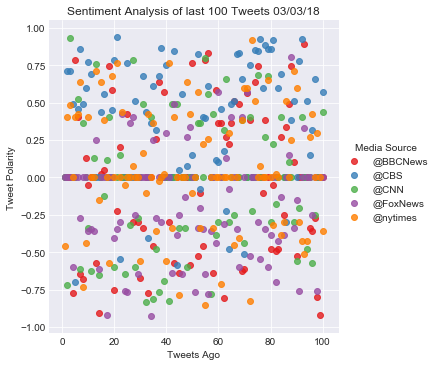

In [125]:
import seaborn as sns
sns.set_style("darkgrid")
sns.lmplot(x="Tweets Ago", y="Compound", data=sentiments_pd, fit_reg=False, hue='Media Source', palette="Set1")
plt.title("Sentiment Analysis of last 100 Tweets " + (time.strftime("%x")))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")

plt.show()

In [113]:
# Group by Media Source
media_group = pd.DataFrame(sentiments_pd.groupby('Media Source').mean())

#avg_sentiment = pd.DataFrame(media_group["Compound"].mean())

#avg_sentiment
media_group = media_group.reset_index()
media_group

,Media Source,Compound,Negative,Neutral,Positive,Tweets Ago
0,@BBCNews,-0.024599,0.80426,0.10936,0.08633,50.5
1,@CBS,0.327892,0.81746,0.02827,0.15426,50.5
2,@CNN,-0.031819,0.84224,0.08406,0.07376,50.5
3,@FoxNews,-0.158389,0.82378,0.12116,0.05508,50.5
4,@nytimes,0.056433,0.84028,0.06611,0.09361,50.5


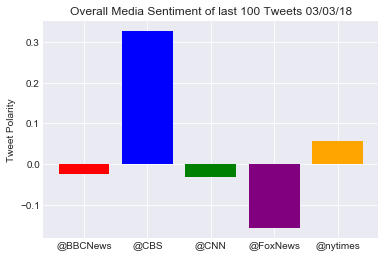

In [117]:
sns.set_style("darkgrid")
plt.bar(media_group["Media Source"], media_group["Compound"], color=['red', 'blue', 'green', 'purple', 'orange'])
plt.title("Overall Media Sentiment of last 100 Tweets " + (time.strftime("%x")))
plt.ylabel("Tweet Polarity")
plt.show()

In [127]:
sentiments_pd.to_csv("NewsMood.csv")